<a href="https://colab.research.google.com/github/gutiel2/Machine-Learning-Engineering/blob/main/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Mateo Gutierrez
RIN: 662006635
ML - HW 2
"""

# Loading Dependencies
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Problem 1
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()


# Sample data from the Iris dataset
x1 = iris.data[:, 0]  # Sepal length
x2 = iris.data[:, 1]  # Sepal width
x3 = iris.data[:, 2]  # Petal length
x4 = iris.data[:, 3]  # Petal width

newx1 = x3/x2  # Petal Length to Sepal Width
newx2 = x4/x1  # Petal Width to Sepal Length

X = np.column_stack((newx1, newx2))

y = iris.target

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[2 1 1 1 0 1 2 0 0 2 0 1 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 1 2 0 2 2 2 0 0 1 1 2 1 2 1 1 2 1 1]
accuracy score : 0.9166666666666666


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


preds: [2 0 4 ... 2 4 6]
actual: [[2]
 [0]
 [4]
 ...
 [2]
 [4]
 [6]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           2       0.99      0.98      0.99      1032
           4       0.99      0.99      0.99       982
           6       0.99      0.99      0.99       958
           8       0.99      0.97      0.98       974

    accuracy                           0.99      4926
   macro avg       0.99      0.99      0.99      4926
weighted avg       0.99      0.99      0.99      4926



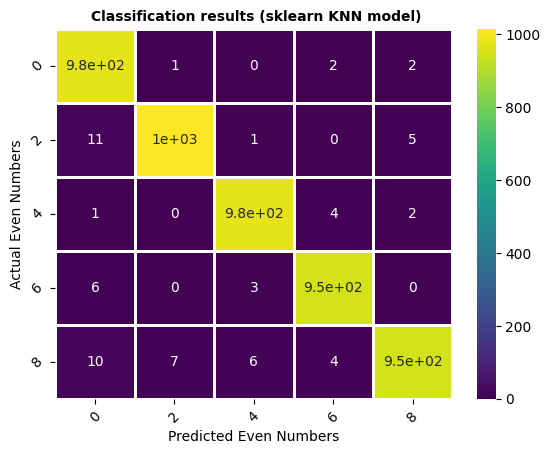

In [ ]:
# Problem 2
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST comes as a  (number of images, pixel width, pixel height) format

# Filtering Data set to even values

# Training Set
train_set = np.isin(y_train, [0, 2, 4, 6, 8])
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)

x_train = x_train [train_set]
y_train = y_train [train_set]

# Testing Set
test_set = np.isin(y_test, [0, 2, 4, 6, 8])

x_test = x_test.reshape(x_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

x_test = x_test [test_set]
y_test = y_test [test_set]

skmodel.fit(x_train,y_train)
print('preds:', skmodel.predict(x_test))
print('actual:', y_test)
cm_sk = confusion_matrix(y_test, skmodel.predict(x_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels([0, 2, 4, 6, 8]);
ax.set_yticklabels([0, 2, 4, 6, 8]);
plt.xlabel('Predicted Even Numbers');
plt.ylabel('Actual Even Numbers');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(x_test)))

In [ ]:
 # Problem 3
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading Data
data = load_iris()
df = pd.DataFrame()

# Formatting Data
df = load_iris(as_frame=True)
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]
full_X = df.data.to_numpy()
# X=df.data.to_numpy() Testing with four features
X = np.delete(full_X, 3, 1) # Truncating to use only three features
y = df['target'].to_numpy()

X_train shape : (45, 3)
X_test shape : (105, 3)
y_train shape : (45,)
y_test shape : (105,)
predicted_labels: [1 2 2 2 1 2 0 0 2 2 1 1 2 2 1 0 1 0 1 1 1 0 1 1 0 0 2 0 0 0 1 2 2 0 1 1 2
 1 2 2 1 1 2 2 1 2 2 1 2 1 0 1 2 0 0 0 0 2 1 0 1 1 1 1 2 1 0 2 1 1 2 1 1 0
 2 0 1 0 1 2 2 1 1 2 1 2 1 1 2 2 0 2 0 1 0 2 0 2 0 1 1 2 0 1 1]
cluster centroids: [[6.79333333 3.07333333 5.52      ]
 [5.80666667 2.7        4.28666667]
 [4.91333333 3.33333333 1.47333333]]


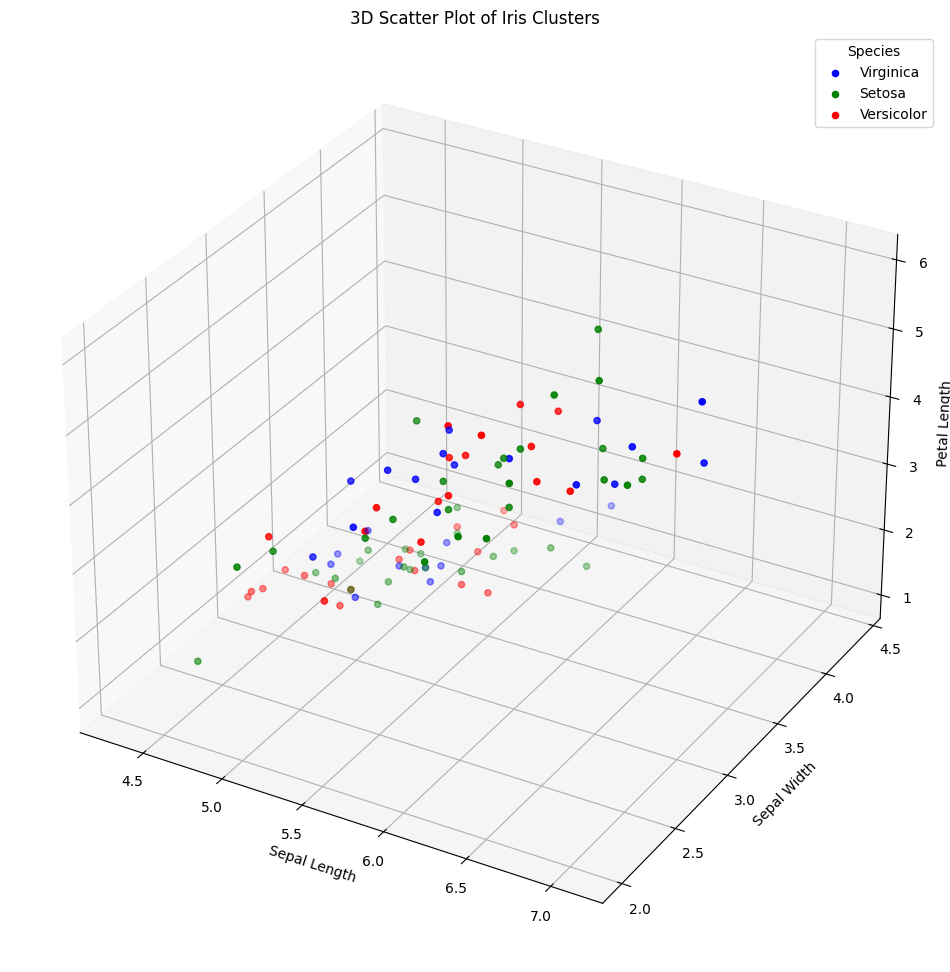

In [106]:
# Model Creation (Utilizing Code from Class)

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.7,
    random_state=123,
    shuffle=True,
    stratify=y)

# Ensuring only using three features
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

# Creation of 3D scatterplot
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

# Mapping sk_model labels to species names
label_to_species = {0: 'Virginica', 1: 'Setosa', 2: 'Versicolor'}
colors = ['blue', 'green', 'red']  # Colors for each cluster

# Plot each cluster with mapped labels and colors
for label, species in label_to_species.items():
    ix = np.where(kmeans_labels == label)
    ax.scatter(X[ix, 0], X[ix, 1], X[ix, 2], color=colors[label], label=species)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Clusters')
ax.legend(title="Species")

plt.show()


In [74]:
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)
skmodel.labels_
skmodel.predict(X_test)
skmodel_labels = skmodel.predict(X)
df['skmodel_labels'] = skmodel_labels


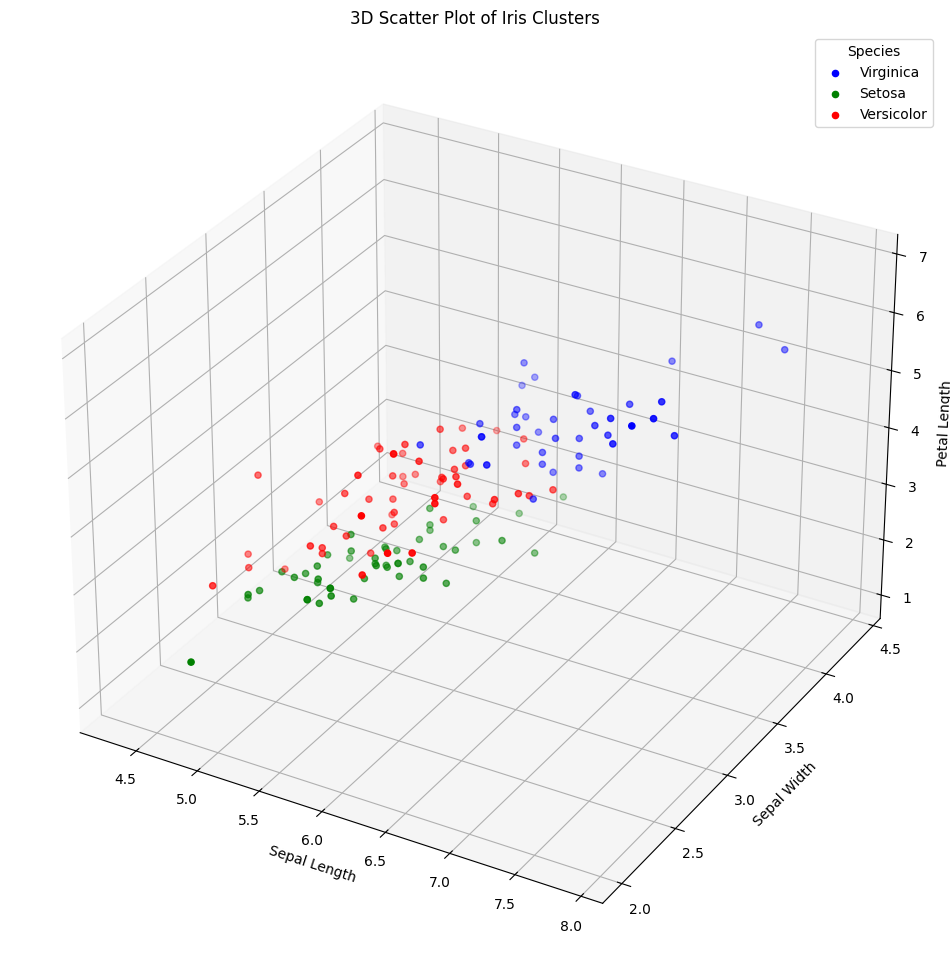

In [105]:
# Creation of 3D scatterplot
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

# Mapping sk_model labels to species names
label_to_species = {0: 'Virginica', 1: 'Setosa', 2: 'Versicolor'}
colors = ['blue', 'green', 'red']  # Colors for each cluster

# Plot each cluster with mapped labels and colors
for label, species in label_to_species.items():
    ix = np.where(skmodel_labels == label)
    ax.scatter(X[ix, 0], X[ix, 1], X[ix, 2], color=colors[label], label=species)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Clusters')
ax.legend(title="Species")

plt.show()